# BoomBikes Assignment

Problem Statment:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues. They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know :

Which variables are significant in predicting the demands for shred bikes.
How well those variables describe the bike demands.

In [112]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

In [113]:
data = pd.read_csv(r"C:\Users\Nivass\Downloads\Upgrad\Bike Assignment\day.csv")

In [114]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


 - we can extract the day from dteday and drop the column
 - We can drop the column instant , it is of no use

In [116]:
data['dteday'] = pd.to_datetime(data['dteday'], infer_datetime_format=True)


In [117]:
data = data.drop(['dteday','instant'],axis=1)

In [118]:
data.sample(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
604,3,1,8,0,2,1,1,29.861653,33.30250,62.0000,12.791975,935,6105,7040
452,2,1,3,0,4,1,1,20.260847,24.11520,43.9167,21.416550,834,5299,6133
244,3,0,9,0,5,1,2,26.376653,30.24040,72.7083,9.375243,875,3852,4727
697,4,1,11,0,4,1,1,11.515670,14.92110,55.5652,7.739974,243,5080,5323
566,3,1,7,0,6,0,3,24.429153,27.49560,86.5417,14.291100,1264,3195,4459
371,1,1,1,0,6,0,1,16.126653,19.53895,53.1667,11.708786,1070,3451,4521
89,2,0,3,0,4,1,3,11.001653,12.87875,91.8333,14.582282,179,1506,1685
108,2,0,4,0,2,1,2,20.739153,24.46290,66.5833,10.584057,409,2795,3204
51,1,0,2,1,1,0,2,12.436653,14.20375,60.5000,20.625682,195,912,1107
5,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606


In [119]:
data.shape

(730, 14)

In [120]:
data.isna().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [121]:
dup= data.copy()
dup.drop_duplicates(subset=None, inplace=True)
dup.shape

(730, 14)

The shape after running the drop duplicate command is same as the original dataframe.

Hence we can conclude that there were zero duplicate values in the dataset.

# Data Visualization

In [122]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000


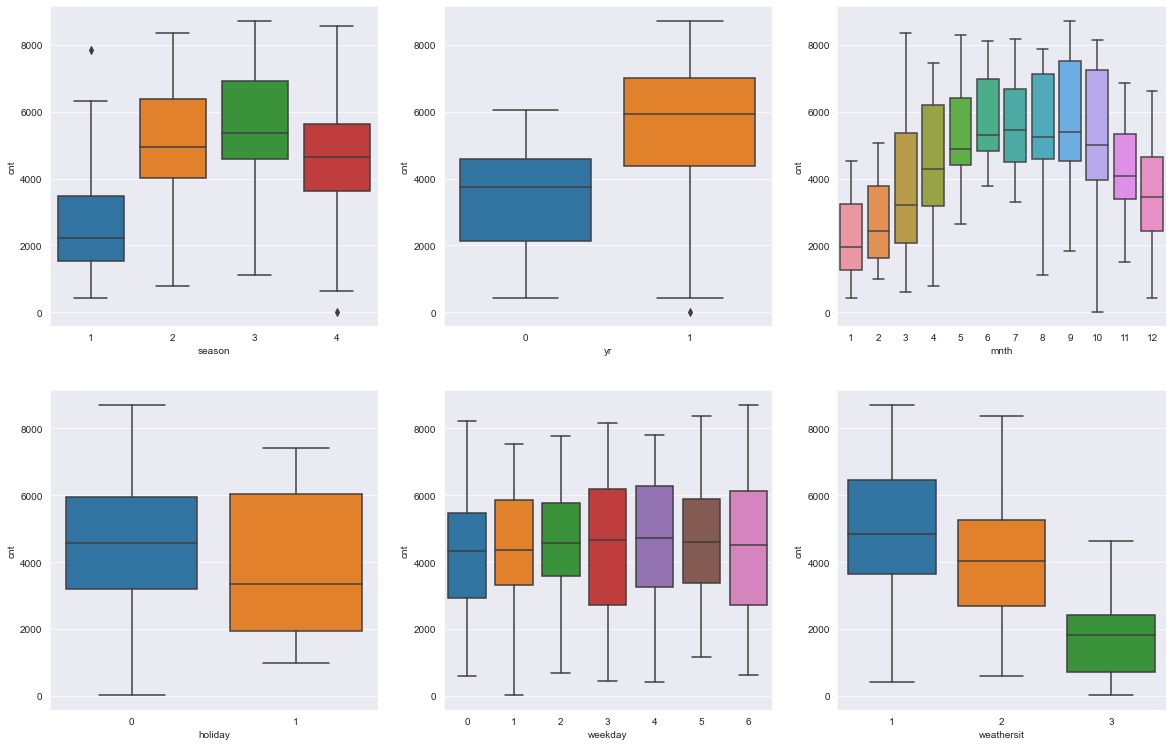

In [123]:
#visualizing categorical variables
plt.figure(figsize=(20,20))
plt.subplot(331)
sns.boxplot(x='season', y='cnt',data=data)
plt.subplot(332)
sns.boxplot(x='yr', y='cnt',data=data)
plt.subplot(333)
sns.boxplot(x='mnth', y='cnt',data=data)
plt.subplot(334)
sns.boxplot(x='holiday', y='cnt',data=data)
plt.subplot(335)
sns.boxplot(x='weekday', y='cnt',data=data)
plt.subplot(336)
sns.boxplot(x='weathersit', y='cnt',data=data)
plt.show();

- **There is a hike in demand in summer and fall season**
- **More Number of Bike has been rented in the year 2019 than last year (2018)**
- **Rent of bike is least on the Holiday**
- **There is inconsistency over the week**
- **Users Prefer to Rent Bike if the Environment is Clear**

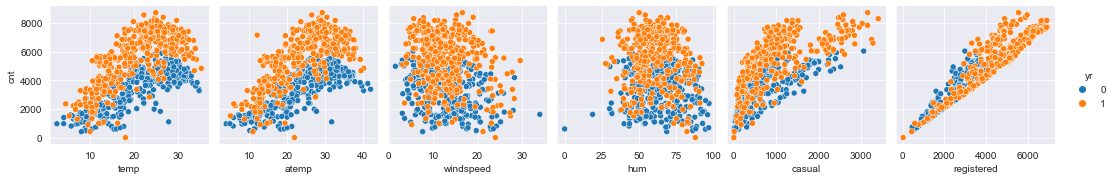

In [124]:
sns.pairplot(data, x_vars=["temp",'atemp', 'windspeed',"hum",'casual','registered'],y_vars=['cnt'],hue ='yr')
plt.show()

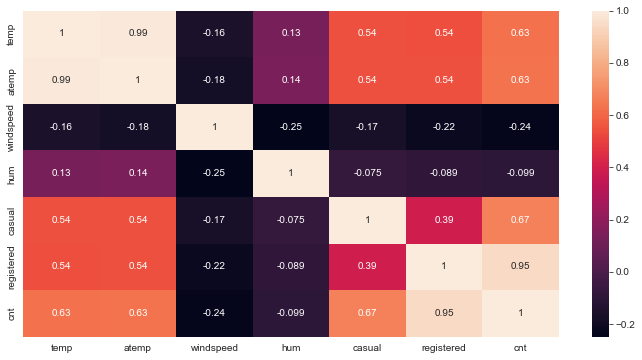

In [125]:
plt.figure(figsize = (12,6))
sns.heatmap(data[["temp",'atemp', 'windspeed',"hum",'casual','registered','cnt']].corr(),annot =True)
plt.show()

- atemp and temp are highly correlated , so we will drop one of them
- casual and registered are both target features because only when a user has rented we will know casual or registered , since   we have a target variable we will drop casual but keep regitered as it has positive correalation with target variable

In [126]:
data = data.drop(['atemp','casual','registered'],axis =1)
data.sample(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
539,3,1,6,0,0,0,1,30.476653,47.9167,9.750175,6891
394,1,1,1,0,1,1,1,11.035847,40.0833,14.458064,3624
399,1,1,2,0,6,0,2,10.830847,77.9583,8.167032,2832
640,4,1,10,0,3,1,2,26.957500,79.3750,4.458569,7572
583,3,1,8,0,2,1,2,30.169153,70.3750,7.832836,7273
670,4,1,11,0,5,1,1,14.555000,52.2083,17.833725,5847
469,2,1,4,0,0,0,1,24.873347,50.7917,15.083643,7132
58,1,0,2,0,1,1,2,16.698193,87.6364,19.408962,1446
317,4,0,11,0,1,1,1,21.730000,58.7083,20.541932,4486
38,1,0,2,0,2,1,1,9.054153,53.7917,24.250650,1530


# Creating Dummy Variables

In [127]:
data.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

The season column has 4 values indication
 - 1- Spring
 - 2- Summer
 - 3- Fall
 - 4- Winter

We encode the dummy variables for this column

In [128]:
new_season = pd.get_dummies(data['season'])
new_season.head()

,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


We now replace 1,2,3,4 with spring,summer,fall,winter respectively

In [129]:
new_season = new_season.rename(columns={1:'spring', 2:'summer', 3:'fall', 4:'winter'},inplace = False)
new_season.sample(5)

,spring,summer,fall,winter
365,1,0,0,0
350,0,0,0,1
496,0,1,0,0
166,0,1,0,0
522,0,1,0,0


we don't need all four columns we can drop any one column because each of the column can be explained by remaining three. 

  - 000 will corresponds to spring
  - 100 will corresponds to summer
  - 010 will corresponds to fall
  - 001 will corresponds to winter

In [130]:
new_season = new_season.drop('spring',axis=1)
data = data.drop('season',axis=1)
data = pd.concat((data,new_season),axis=1)

In [131]:
data.sample(10)

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,summer,fall,winter
326,0,11,0,3,1,2,18.074153,75.7917,22.500275,2566,0,0,1
96,0,4,0,4,1,1,17.937500,60.2917,10.874904,3141,1,0,0
44,0,2,0,1,1,1,17.015000,37.5833,27.999836,1913,0,0,0
206,0,7,0,2,1,1,31.638347,54.0833,13.417286,4590,0,1,0
607,1,8,0,5,1,1,31.330847,58.7500,11.291711,7350,0,1,0
134,0,5,0,0,0,2,23.062500,86.7083,10.249593,4553,1,0,0
393,1,1,0,0,0,1,11.582500,31.1250,16.083350,3243,0,0,0
445,1,3,0,4,1,1,22.720847,83.1250,7.876654,6871,1,0,0
619,1,9,0,3,1,1,24.565847,57.7083,8.833682,7870,0,1,0
542,1,6,0,3,1,1,28.597500,36.0000,18.208925,7335,0,1,0


We repeat the same process for Month

In [132]:
new_month = pd.get_dummies(data['mnth'])
new_month = new_month.rename(columns={ 1:'Jan',2:'Feb',3:'March',4:'April',5:'May', \
                               6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'},inplace = False)
data = pd.concat((data,new_month),axis=1)
data = data.drop(['mnth','Jan'],axis=1)
data.sample(10)

,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,summer,...,March,April,May,June,July,Aug,Sep,Oct,Nov,Dec
85,0,0,0,0,2,10.374763,49.3913,12.348100,1693,1,...,1,0,0,0,0,0,0,0,0,0
218,0,0,0,0,1,30.442500,75.2917,13.499629,3785,0,...,0,0,0,0,0,1,0,0,0,0
619,1,0,3,1,1,24.565847,57.7083,8.833682,7870,0,...,0,0,0,0,0,0,1,0,0,0
193,0,0,3,1,1,30.613347,63.1667,9.790911,4342,0,...,0,0,0,0,1,0,0,0,0,0
541,1,0,2,1,1,25.864153,37.3333,23.292014,7442,0,...,0,0,0,1,0,0,0,0,0,0
292,0,0,4,1,1,19.509153,63.6250,28.292425,4195,0,...,0,0,0,0,0,0,0,1,0,0
38,0,0,2,1,1,9.054153,53.7917,24.250650,1530,0,...,0,0,0,0,0,0,0,0,0,0
447,1,0,6,0,2,20.602500,88.5417,12.916461,3372,1,...,1,0,0,0,0,0,0,0,0,0
131,0,0,4,1,1,21.935000,74.7500,12.707689,4864,1,...,0,0,1,0,0,0,0,0,0,0
543,1,0,4,1,1,30.715847,42.2500,11.500550,6879,0,...,0,0,0,1,0,0,0,0,0,0


We repeat the same process for Weeks

In [133]:
new_week = pd.get_dummies(data['weekday'])
new_week = new_week.rename(columns={1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thrusday', \
                                   5:'Friday',6:'Saturday',0:'Sunday'},inplace = False)
data = pd.concat((data,new_week),axis=1)
data = data.drop(['weekday','Sunday'],axis=1)
data.sample(10)

,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,summer,fall,...,Sep,Oct,Nov,Dec,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday
697,1,0,1,1,11.515670,55.5652,7.739974,5323,0,0,...,0,0,1,0,0,0,0,1,0,0
403,1,0,1,2,10.523347,72.2917,8.959307,2802,0,0,...,0,0,0,0,0,0,1,0,0,0
32,0,0,1,2,10.660000,77.5417,17.708636,1526,0,0,...,0,0,0,0,0,0,1,0,0,0
500,1,0,1,1,26.103347,69.7917,8.208304,7424,1,0,...,0,0,0,0,0,0,1,0,0,0
228,0,0,1,1,29.656653,57.5417,9.625689,4694,0,1,...,0,0,0,0,0,0,1,0,0,0
150,0,0,1,1,31.775000,63.6667,7.459043,3982,1,0,...,0,0,0,0,0,1,0,0,0,0
717,1,0,1,1,13.632500,62.5417,12.334164,5267,0,0,...,0,0,0,1,0,0,1,0,0,0
371,1,0,0,1,16.126653,53.1667,11.708786,4521,0,0,...,0,0,0,0,0,0,0,0,0,1
280,0,0,0,1,21.388347,70.1250,3.042081,5409,0,0,...,0,1,0,0,0,0,0,0,0,1
369,1,0,1,1,10.899153,52.4167,8.709129,3272,0,0,...,0,0,0,0,0,0,0,1,0,0


The weathersit column has 4 values indication

- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

we will the same process for weathersit

In [134]:
new_Weathersit  = pd.get_dummies(data['weathersit'])
new_Weathersit = new_Weathersit.rename(columns = {1:'Clear' ,2: 'Mist' , 3: 'Light'},inplace = False)
data = pd.concat((data,new_Weathersit),axis=1)
data = data.drop('weathersit',axis=1)
data.sample(10)

,yr,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,...,Dec,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday,Clear,Mist,Light
220,0,0,1,31.775000,57.0417,10.125107,4602,0,1,0,...,0,0,1,0,0,0,0,1,0,0
564,1,0,1,31.570000,60.0417,11.083743,6591,0,1,0,...,0,0,0,0,1,0,0,1,0,0
722,1,0,1,9.483464,79.1304,5.174437,920,0,0,0,...,1,1,0,0,0,0,0,0,1,0
338,0,0,1,15.819153,82.7083,4.167956,3811,0,0,1,...,1,1,0,0,0,0,0,0,1,0
337,0,0,0,13.564153,77.5833,5.625206,3485,0,0,1,...,1,0,0,0,0,0,0,1,0,0
183,0,0,0,29.383347,68.2500,15.333486,4649,0,1,0,...,0,0,0,0,0,0,0,0,1,0
411,1,0,1,12.983347,75.2917,6.125475,3005,0,0,0,...,0,0,0,0,1,0,0,0,1,0
446,1,0,1,24.668347,69.4167,7.792100,8362,1,0,0,...,0,0,0,0,0,1,0,0,1,0
567,1,0,0,27.367500,76.2500,6.292694,7410,0,1,0,...,0,0,0,0,0,0,0,0,1,0
292,0,0,1,19.509153,63.6250,28.292425,4195,0,0,1,...,0,0,0,0,1,0,0,1,0,0


As the Feture Working Days is already Binary Encoded so no further Data Preparation is needed.

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   hum         730 non-null    float64
 5   windspeed   730 non-null    float64
 6   cnt         730 non-null    int64  
 7   summer      730 non-null    uint8  
 8   fall        730 non-null    uint8  
 9   winter      730 non-null    uint8  
 10  Feb         730 non-null    uint8  
 11  March       730 non-null    uint8  
 12  April       730 non-null    uint8  
 13  May         730 non-null    uint8  
 14  June        730 non-null    uint8  
 15  July        730 non-null    uint8  
 16  Aug         730 non-null    uint8  
 17  Sep         730 non-null    uint8  
 18  Oct         730 non-null    uint8  
 19  Nov         730 non-null    u

# Preparing the Data for Modeling

In [136]:
# Splitting the Data into Training and Testing Sets
df_train,df_test = train_test_split(data,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


### Min-Max Scaling

In [137]:
scaler = MinMaxScaler()

# Create a list of Numerical Variables which need to Scaled
num_vars = ['temp', 'windspeed',"hum",'cnt']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,510.0,0.507843,0.500429,0.0,0.000000,1.000000,1.000000,1.0
holiday,510.0,0.025490,0.157763,0.0,0.000000,0.000000,0.000000,1.0
workingday,510.0,0.676471,0.468282,0.0,0.000000,1.000000,1.000000,1.0
temp,510.0,0.537440,0.225858,0.0,0.339853,0.542596,0.735215,1.0
hum,510.0,0.650480,0.145846,0.0,0.538643,0.653714,0.754830,1.0
windspeed,510.0,0.320883,0.169803,0.0,0.199179,0.296763,0.414447,1.0
cnt,510.0,0.513499,0.224421,0.0,0.356420,0.518638,0.684710,1.0
summer,510.0,0.247059,0.431725,0.0,0.000000,0.000000,0.000000,1.0
fall,510.0,0.262745,0.440557,0.0,0.000000,0.000000,1.000000,1.0
winter,510.0,0.247059,0.431725,0.0,0.000000,0.000000,0.000000,1.0


We can see MinMax Scaling has been done properly for the Training Data as the Minimum value is 0 for each of the Feature and Maximum value is 1 for each of the Feature

#### Dividing X and Y for model building.

In [138]:
y_train = df_train.pop('cnt')
X_train = df_train
print(X_train.shape)
y_train.sample(5)

(510, 29)


595    0.520824
281    0.631500
23     0.160377
266    0.621376
172    0.515992
Name: cnt, dtype: float64

## Feature Selection using RFE(Recursive Feature Elimination)

In [139]:
# Running RFE with the Output Number of variables equals to 15
lm = LinearRegression()
lm.fit(X_train,y_train)
# Running RFE
rfe = RFE(lm,15)
rfe = rfe.fit(X_train, y_train)

In [140]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', False, 2),
 ('winter', True, 1),
 ('Feb', False, 7),
 ('March', False, 3),
 ('April', False, 5),
 ('May', False, 4),
 ('June', False, 6),
 ('July', False, 8),
 ('Aug', True, 1),
 ('Sep', True, 1),
 ('Oct', True, 1),
 ('Nov', False, 9),
 ('Dec', False, 10),
 ('Monday', False, 11),
 ('Tuesday', False, 12),
 ('Wednesday', False, 14),
 ('Thrusday', False, 15),
 ('Friday', False, 13),
 ('Saturday', True, 1),
 ('Clear', True, 1),
 ('Mist', True, 1),
 ('Light', True, 1)]

In [141]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'Aug', 'Sep', 'Oct', 'Saturday', 'Clear', 'Mist', 'Light'],
      dtype='object')

In [142]:
# Features Rejected by the RFE
X_train.columns[~(rfe.support_)]

Index(['fall', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Nov', 'Dec',
       'Monday', 'Tuesday', 'Wednesday', 'Thrusday', 'Friday'],
      dtype='object')

### Building Model using statsmodels for the detailed statistics

In [143]:
# Creating X train with RFE Selected Variables
X_train_rfe = X_train[col]

In [144]:
# Adding Constant
X_train_rfe = sm.add_constant(X_train_rfe)

# Create Object for the Model
lm = sm.OLS(y_train, X_train_rfe).fit()

# View Summary of Statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          8.70e-192
Time:                        00:05:56   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0701      0.025      2.765      0.006       0.020       0.120
yr             0.2292      0.008     28.712      0.000       0.214       0.245
holiday       -0.0557      0.027     -2.069      0.039      -0.109      -0.003
workingday     0.0442      0.012      3.829      0.000       0.022       0.067
temp           0.5309      0.022     24.146      0.000       0.488       0.574
hum           -0.1708      0.037     -4.620      0.000      -0.243      -0.098
windspeed     -0.1858      0.025     -7.353      0.000      -0.235      -0.136
summer         0.1049      0.011      9.778      0.000       0.084       0.126
winter         0.1349      0.012     11.306      0.000       0.111       0.158
Aug            0.0557      0.016      3.457      0.001       0.024       0.087
Sep            0.1252      0.016      7.757      0.000       0.093       0.157
Oct            0.0385      0.017      2.230      0.026       0.005       0.072
Saturday       0.0527      0.015      3.627      0.000       0.024       0.081
Clear          0.1246      0.009     14.641      0.000       0.108       0.141
Mist           0.0679      0.011      5.937      0.000       0.045       0.090
Light         -0.1224      0.022     -5.604      0.000      -0.165      -0.079
==============================================================================
Omnibus:                       70.710   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.743
Skew:                          -0.710   Prob(JB):                     4.18e-39
Kurtosis:                       5.511   Cond. No.                     1.13e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.32e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

As the Statistics Report say there is strong multicollinearity problems so we need to check for VIF

In [145]:
# Calculation of VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
13,Clear,inf
14,Mist,inf
15,Light,inf
3,workingday,1.88
5,hum,1.87
12,Saturday,1.79
8,winter,1.71
4,temp,1.59
11,Oct,1.49
9,Aug,1.46


In [146]:
# As VIF is Infnity for the Feature 'Clear' so we can drop it 
X_train_rfe = X_train_rfe.drop('Clear',axis=1)
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'summer', 'winter', 'Aug', 'Sep', 'Oct', 'Saturday', 'Mist', 'Light'],
      dtype='object')

In [147]:
# Add constant to all the Variables
X_train_sm = sm.add_constant(X_train_rfe)
# Create the Model
lr = sm.OLS(y_train, X_train_sm)
# Fit the Model
lr_model = lr.fit()
# View the Parameter of the Model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          8.70e-192
Time:                        00:05:57   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1948      0.029      6.769      0.000       0.138       0.251
yr             0.2292      0.008     28.712      0.000       0.214       0.245
holiday       -0.0557      0.027     -2.069      0.039      -0.109      -0.003
workingday     0.0442      0.012      3.829      0.000       0.022       0.067
temp           0.5309      0.022     24.146      0.000       0.488       0.574
hum           -0.1708      0.037     -4.620      0.000      -0.243      -0.098
windspeed     -0.1858      0.025     -7.353      0.000      -0.235      -0.136
summer         0.1049      0.011      9.778      0.000       0.084       0.126
winter         0.1349      0.012     11.306      0.000       0.111       0.158
Aug            0.0557      0.016      3.457      0.001       0.024       0.087
Sep            0.1252      0.016      7.757      0.000       0.093       0.157
Oct            0.0385      0.017      2.230      0.026       0.005       0.072
Saturday       0.0527      0.015      3.627      0.000       0.024       0.081
Mist          -0.0568      0.010     -5.482      0.000      -0.077      -0.036
Light         -0.2470      0.026     -9.484      0.000      -0.298      -0.196
==============================================================================
Omnibus:                       70.710   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.743
Skew:                          -0.710   Prob(JB):                     4.18e-39
Kurtosis:                       5.511   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [148]:
# Again Checking the VIF Score
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,53.47
3,workingday,1.88
5,hum,1.87
12,Saturday,1.79
8,winter,1.71
4,temp,1.59
13,Mist,1.56
11,Oct,1.49
9,Aug,1.46
7,summer,1.38


- We have Prob(F-statistic) is very low Which tells Overall model is a good Fit.

- We got quite Good Adjusted R2 Score i.e 84.3%

- All the P Value are less than 0.05, Which say that all the 14 Features are Statistically Significant

- Hence we can go ahaed with the current Model for Prediction and Evaluation.

# Residual Analysis

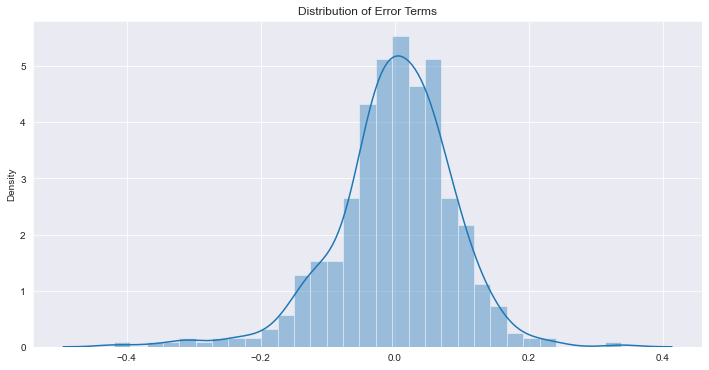

In [149]:
# Calculation of Error in Prediction for Training Data
y_train_pred = lr_model.predict(X_train_sm)
res = (y_train - y_train_pred)
# Ploting of Residuals
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.distplot(res)
plt.title('Distribution of Error Terms')
plt.show()

**We can see Error Terms are normally Distributed with mean Zero. Hence Model is Actaully obeying the assumption of Normality**.

## Looking for patterns in the residuals

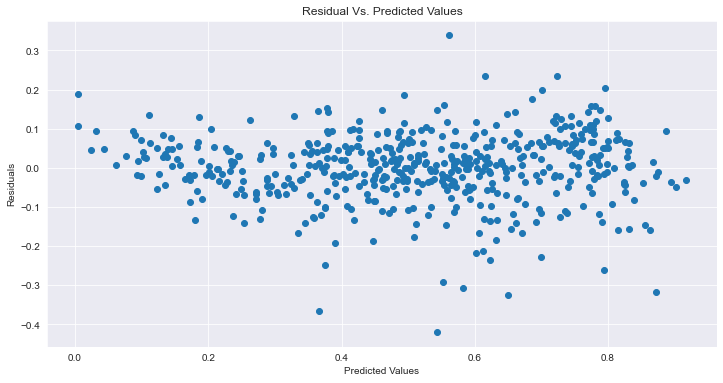

In [150]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
plt.scatter(y_train_pred,res)
plt.title('Residual Vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

**We can see there is no specific Pattern observed in the Error Terms with respect to Prediction, hence we can say Error terms are independent of each other**.

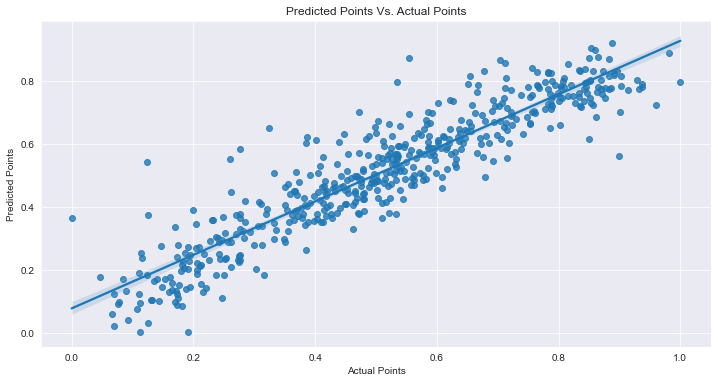

In [157]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.show()

We can see Error Terms have approximatly a Constant Variance, Hence it follows the Assumption of Homoscedasticity

# Model Evaluation on Test Dataset

Applying Min-Max Scaling on test data

In [151]:
num_vars = ['temp', 'windspeed',"hum",'cnt']

df_test[num_vars]=scaler.transform(df_test[num_vars])

y_test = df_test.pop('cnt')
X_test = df_test
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,summer,fall,winter,...,Dec,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday,Clear,Mist,Light
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,1,0,...,0,1,0,0,0,0,0,0,1,0
535,1.0,1,0,1,0.901354,0.610133,0.153728,1,0,0,...,0,0,0,1,0,0,0,1,0,0
299,1.0,0,0,1,0.511964,0.837699,0.334206,0,0,1,...,0,0,0,0,1,0,0,0,1,0
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,1,0,...,0,0,0,1,0,0,0,1,0,0
152,1.0,0,0,1,0.817246,0.314298,0.537414,1,0,0,...,0,0,0,0,1,0,0,1,0,0


In [152]:
#Dropping the Features which were eliminated during the Training Process
X_test_sm = X_test_sm.drop(['fall', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Nov', 'Dec', \
       'Monday', 'Tuesday', 'Wednesday', 'Thrusday', 'Friday','Clear'],axis=1)

# Predict the Price for Test Data using the Trainned Model
y_test_pred = lr_model.predict(X_test_sm)

y_test_pred.sample(5)

614    0.838324
341    0.329499
674    0.597516
22     0.061078
606    0.834475
dtype: float64

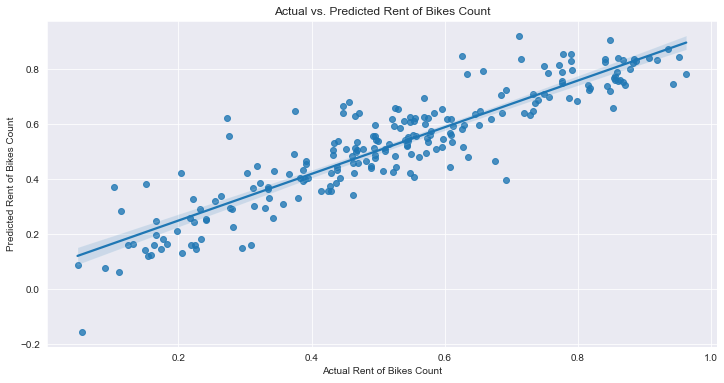

In [153]:
# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.regplot(x=y_test, y=y_test_pred)
plt.title('Actual vs. Predicted Rent of Bikes Count')
plt.xlabel('Actual Rent of Bikes Count')
plt.ylabel('Predicted Rent of Bikes Count')
plt.show()

**Above Scatter Plot Shows the Linear Relationship between Actual Rent of Bikes Count and Predicted Rent of Bikes Count.**


In [154]:
# Checking the Accuracy of the Test Model
from sklearn.metrics import r2_score
r2_score(y_test,y_test_pred)

0.8149002944843474

- **The Final Model accuray is around 81.5%, Which is a Good Score.**

- **The Model accuracy difference between the Train and Test Data is less than 3% which is acceptable.**

In [155]:
Cofficients = round(lr_model.params,2)
beta = Cofficients.sort_values(ascending = False)
beta

temp          0.53
yr            0.23
const         0.19
winter        0.13
Sep           0.13
summer        0.10
Aug           0.06
Saturday      0.05
workingday    0.04
Oct           0.04
holiday      -0.06
Mist         -0.06
hum          -0.17
windspeed    -0.19
Light        -0.25
dtype: float64

In [156]:
for i in range(0, len(beta)):
    print(beta[i],'*',beta.index[i],end ='')
    print(' + ',end ='')

0.53 * temp + 0.23 * yr + 0.19 * const + 0.13 * winter + 0.13 * Sep + 0.1 * summer + 0.06 * Aug + 0.05 * Saturday + 0.04 * workingday + 0.04 * Oct + -0.06 * holiday + -0.06 * Mist + -0.17 * hum + -0.19 * windspeed + -0.25 * Light + 

## The Equation for best fitted line:

cnt = 0.53 temp + 0.23 yr + 0.13 winter + 0.13 Sep + 0.1 summer + 0.06 Aug + 0.05 Saturday + 0.04 workingday + 0.04 Oct - 0.06 holiday - 0.06 Mist - 0.17 hum - 0.19 windspeed - 0.25 Light + 0.19

## Insights:

- Temperature is the Most Significant Feature which affects the Business positively,

- Whereas the other Environmental condition such as Raining, Humidity, Windspeed and Cloudy affects the Business negatively.

- Company need to think how to tackle with bad weather condition and come up with sort of solution which protect users from Raining.

- The Demand of Bikes is more in the Winter and Summer season, mostly user don't like to travel using Bikes in Rainy Day or Rainy Season.

- It is interesting to see Specially Saturday People like to Rent a Bike more than other usual Days

- Demand of Bike Rent has been significantly increased in the 2019 than 2018 so it is clear sign that Boom Bikes is doing a Business.

- Even though without expending a single cent BOOM Bikes can expect their business to grow by 19%